# A calculation of the order of convergence when the limit value is unknown

## _This problem is an optional extension of the previous exercise sheets_

<span style="color:green">JMS</span>.

Assume we have determined numerically an approximate value $f_{\Delta x}$ of a function (for example, of a derivative) using a numerical mesh with grid cells $\Delta x$. We say that a numerical approximation converges toward a limit value $f_{lim}$ with $m$-order approximation if we can write to leading order for all $\Delta x$ which are sufficiently small.

$$f_{\Delta x} = f_{lim} + A(\Delta x)^m  \tag{1}$$

with $A$ a constant. If the global domain in $x$ has length $L$ and has been divided into $N$ intervals (so that  $\Delta x = L/N$), then we have:

$$f_N = f_{lim} + A\left(\frac{L}{N}\right)^m  \tag{2}$$

From there it is straightforward to obtain:

$$\frac{f_{4N}-f_{2N}}{f_{2N}-f_{N}} = \frac{4^{m}-2^{m}}{2^{m}-1} = 2^{m}  \tag{3}$$

or, in other words,

$$m = \log\left(\frac{f_{4N}-f_{2N}}{f_{2N}-f_{N}}\right)/\log2  \tag{4}$$

with log the natural logarithm. Thus, if we obtain a numerical value for a function at a given point with increasing order of approximation using $N$, $2N$, and $4N$ intervals in a given domain, we can calculate the order $m$ of the approximation using Eq. (4) without having to know in advance the exact analytical limit value. Test this method with `np.deriv_cent` and `np.deriv_4tho` and fill in `nm.order_conv`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from nm_lib import nm_lib as nm

In [2]:
## Define intervals 
nump = 128      # Number of points
x0   = -4.0 
xf   = 10.0

def h(x): 
    r""" 
    Solves the function h(x) from equation 1) 

    Parameters
    ----------
    x : `array`
       Spatial axis. 
       
    Returns
    ------- 
    `array`
        Spatial evolution of the function h(x) 
    """
    return np.cos(np.pi*(x-1) / 2) * np.exp(-((x-3) / 2.5)**2)

def dhp_analytical(x): 
    """ 
    Solves derivative of the function h(x) from equation 1) using the analytical 
    solution obtained from wolframalpha.com/ 

    Parameters
    ----------
    x : `array`
       Spatial axis. 
       
    Returns
    ------- 
    `array`
        The derivative of the function h(x) 
    """
    return np.exp(-0.16*(-3+x)**2)  *(1.5708*np.cos((np.pi*x)/2) - (-0.96 + 0.32*x) * np.sin((np.pi*x)/2))

xx1  = np.arange(  nump + 1)/(  nump) * (xf-x0) + x0
xx2  = np.arange(2*nump + 1)/(2*nump) * (xf-x0) + x0
xx4  = np.arange(4*nump + 1)/(4*nump) * (xf-x0) + x0

hh = h(xx1)
hh2 = h(xx2)
hh4 = h(xx4)

In [3]:
dx_cent = nm.deriv_cent(xx1, hh)
dx2_cent = nm.deriv_cent(xx2, hh2)
dx4_cent = nm.deriv_cent(xx4, hh4)

dx_4tho = nm.deriv_4tho(xx1, hh)
dx2_4tho = nm.deriv_4tho(xx2, hh2)
dx4_4tho = nm.deriv_4tho(xx4, hh4)

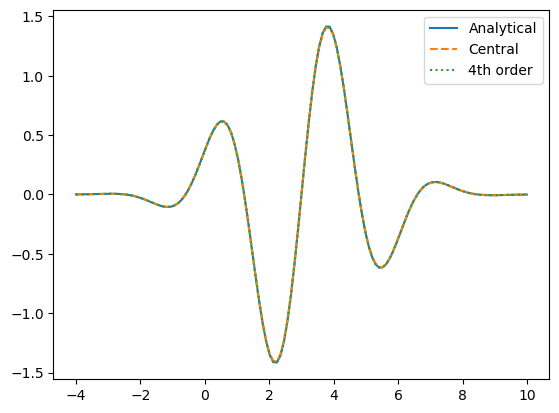

In [4]:
# plot xx against nm.order_conv 
plt.plot(xx1, dhp_analytical(xx1), label='Analytical')
plt.plot(xx1, dx_cent, label='Central', linestyle='--')
plt.plot(xx1, dx_4tho, label='4th order', linestyle=':')
plt.legend()  

<span style="color:pink">

Above, both methods of calculating the spatial derivative, that is`nm.deriv_cent()` and `nm.deriv_4tho()`, are plotted agains the analytical solution to ensure their accuraty. 

After changing the function `deriv_4tho` so that it uses rolling instead of slicing, the function looks good. The central derivative also looks good. 

</span>

Order of convergence for central difference: -1.99
Order of convergence for 4th order difference: -4.08


/home/semya/cs/AST5110/nm_lib/nm_lib/nm_lib.py:99: RuntimeWarning: divide by zero encountered in divide
  return np.ma.log((hh4 - hh2)/(hh2 - hh))/np.log(2)


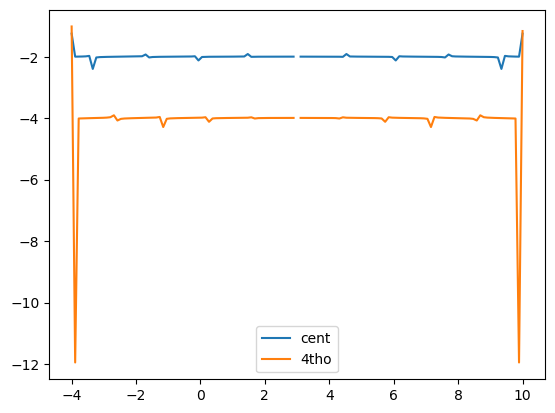

In [5]:
m_cent = nm.order_conv(dx_cent, dx2_cent, dx4_cent)
m_4tho = nm.order_conv(dx_4tho, dx2_4tho, dx4_4tho)

print(f"Order of convergence for central difference: {np.mean(m_cent):.2f}")
print(f"Order of convergence for 4th order difference: {np.mean(m_4tho):.2f}")

plt.plot(xx1, m_cent, label="cent")
plt.plot(xx1, m_4tho, label="4tho")
plt.legend()


<span style="color:pink">

As expected, the order of convergence is 2 for `deriv_cent` and 4 for `derv_4tho`. Depending on the method, it looks like a few points should be removed on either end: 

</span>

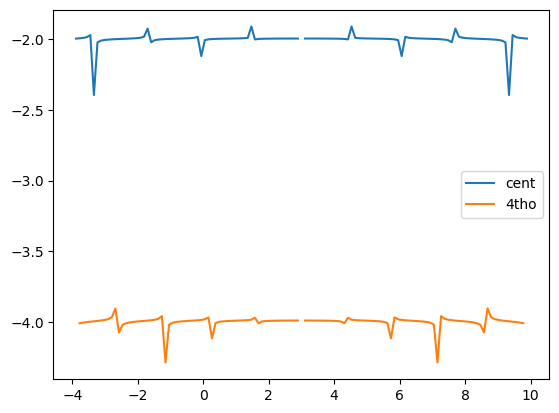

In [6]:
plt.plot(xx1[1:-1], m_cent[1:-1], label="cent")
plt.plot(xx1[2:-2], m_4tho[2:-2], label="4tho")
plt.legend()

<span style="color:pink">

After having removed the points, it is clear that the central scheme has an order of 2, while the 4th order derivative is of order 4. 

This was calculated only using $N$, $2N$, and $4N$ intervals in a given domain. 

</span>

<span style="color:green">JMS</span>.

<span style="color:blue">Great Job!</span>.